In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, wilcoxon, chi2_contingency

In [3]:
path_to_dataset = r"C:\Users\Muhammed Ashik.A\Downloads\Sales_add.csv"
df = pd.read_csv(path_to_dataset)

In [4]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64


In [6]:
print(df.head())

     Month      Region      Manager  Sales_before_digital_add(in $)  \
0  Month-1  Region - A  Manager - A                          132921   
1  Month-2  Region - A  Manager - C                          149559   
2  Month-3  Region - B  Manager - A                          146278   
3  Month-4  Region - B  Manager - B                          152167   
4  Month-5  Region - C  Manager - B                          159525   

   Sales_After_digital_add(in $)  
0                         270390  
1                         223334  
2                         244243  
3                         231808  
4                         258402  


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes
None


In [8]:
print(df.describe())

       Sales_before_digital_add(in $)  Sales_After_digital_add(in $)
count                       22.000000                      22.000000
mean                    149239.954545                  231123.727273
std                      14844.042921                   25556.777061
min                     130263.000000                  187305.000000
25%                     138087.750000                  214960.750000
50%                     147444.000000                  229986.500000
75%                     157627.500000                  250909.000000
max                     178939.000000                  276279.000000


In [9]:
print("Duplicate Values:")
print(df.duplicated().sum())

Duplicate Values:
0


In [15]:
from scipy.stats import shapiro

_, p_before = shapiro(df['Sales_before_digital_add(in $)'])
_, p_after = shapiro(df['Sales_After_digital_add(in $)'])

print("Shapiro-Wilk test for normality:")
print("P-value for Sales_Before:", p_before)
print("P-value for Sales_After:", p_after)

Shapiro-Wilk test for normality:
P-value for Sales_Before: 0.12674309313297272
P-value for Sales_After: 0.7159563302993774


In [16]:
t_stat, p_value = ttest_rel(df['Sales_before_digital_add(in $)'], df['Sales_After_digital_add(in $)'])
print("Paired t-test results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

Paired t-test results:
T-statistic: -12.09070525287017
P-value: 6.336667004575778e-11


In [17]:
contingency_table = pd.crosstab(df['Region'], df['Manager'])

In [18]:
chi2_stat, chi2_p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-square test results:")
print("Chi-square statistic:", chi2_stat)
print("P-value:", chi2_p_value)

Chi-square test results:
Chi-square statistic: 3.050566893424036
P-value: 0.5493991051158094


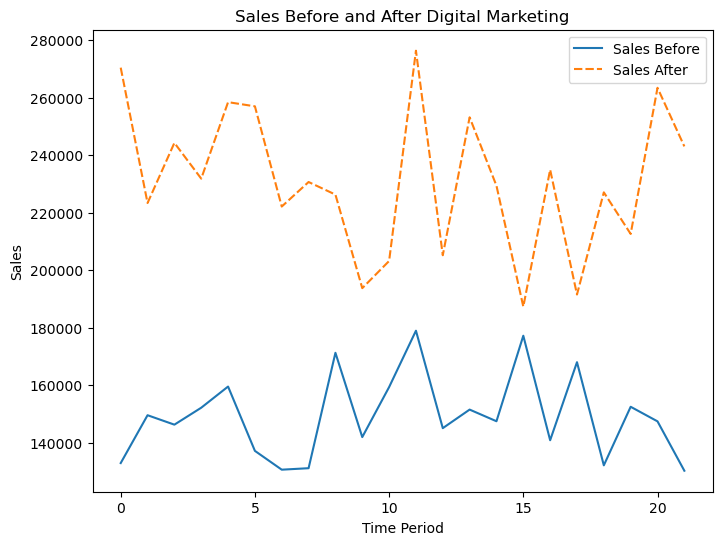

In [19]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df[['Sales_before_digital_add(in $)', 'Sales_After_digital_add(in $)']])
plt.xlabel("Time Period")
plt.ylabel("Sales")
plt.title("Sales Before and After Digital Marketing")
plt.legend(["Sales Before", "Sales After"])
plt.show()

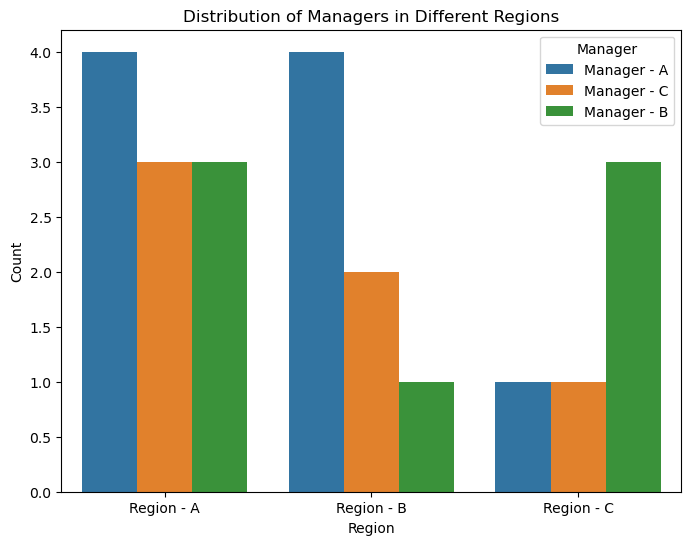

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Region', hue='Manager')
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Distribution of Managers in Different Regions")
plt.show()